<a href="https://colab.research.google.com/github/Yevheniia-Ilchenko/ML_DS_tasks/blob/main/HW_2_1_%D0%9B%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F_%D0%B2%D1%96%D0%B4_%D0%B1%D0%B0%D0%B3%D0%B0%D1%82%D1%8C%D0%BE%D1%85_%D0%B7%D0%BC%D1%96%D0%BD%D0%BD%D0%B8%D1%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
car_df = pd.read_csv("/content/drive/MyDrive/Data/cars.csv")
car_df.head(5)

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [4]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [5]:

for col in car_df:
  print(f"Data types in this column: {car_df[col].apply(type).value_counts()} \n")

Data types in this column: Car_ID
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Brand
<class 'str'>    100
Name: count, dtype: int64 

Data types in this column: Model
<class 'str'>    100
Name: count, dtype: int64 

Data types in this column: Year
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Kilometers_Driven
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Fuel_Type
<class 'str'>    100
Name: count, dtype: int64 

Data types in this column: Transmission
<class 'str'>    100
Name: count, dtype: int64 

Data types in this column: Owner_Type
<class 'str'>    100
Name: count, dtype: int64 

Data types in this column: Mileage
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Engine
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Power
<class 'int'>    100
Name: count, dtype: int64 

Data types in this column: Seats
<class 'int'>    100
Name: count, 

In [6]:
for col in car_df.select_dtypes(include=["object"]):
  print(f"Column: {col} \n Count unique values: {car_df[col].nunique()} \n {car_df[col].unique()} \n\n")

Column: Brand 
 Count unique values: 11 
 ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes'] 


Column: Model 
 Count unique values: 58 
 ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport'] 


Column: Fuel_Type 
 Count unique values: 2 
 ['Petrol' 'Diesel'] 


Column: Transmission 
 Count unique values: 2 
 ['Manual' 'Automatic'] 


Column: Owner_Type 
 Count unique values: 3 
 ['First' 'Second' 'Third'] 




**Висновок:**

При перегляді даних dtypes: int64(8), object(5) ми маємо 8 колонок з цілими числовими значеннями і 5 категоріальних колонок з них:

- 2 бінарні(мають лише два значення)
- 2 мультикатегоріальні де значення не мають відношення порядку(номінальні)
- 1 мультикатегоріальна колонка де є відношення порядку(порядкова) - Owner_Type

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
inputs = car_df.drop(columns=['Price'], inplace=False)
targets = car_df["Price"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

**Кодування бінарних значень Fuel_Type і Transmission**

In [10]:
car_df["Fuel_Type"].value_counts(), car_df["Transmission"].value_counts()


(Fuel_Type
 Petrol    52
 Diesel    48
 Name: count, dtype: int64,
 Transmission
 Automatic    57
 Manual       43
 Name: count, dtype: int64)

In [11]:
def encoding_data():
  list_data = [X_train, X_test]
  fuel_type = {"Diesel": 0, "Petrol": 1}
  transmission = {"Manual": 0, "Automatic": 1}
  for data in list_data:
    data["fuel_type_code"]=data["Fuel_Type"].map(fuel_type)
    data["transmission_code"] = data["Transmission"].map(transmission)
  return X_train, X_test


X_train, X_test = encoding_data()

In [12]:
X_train.drop(columns=["Fuel_Type", "Transmission"], inplace=True), X_test.drop(columns=["Fuel_Type", "Transmission"],inplace=True)

(None, None)

In [13]:
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code
83,84,Volkswagen,T-Roc,2019,22000,Second,18,1498,148,5,1,1
55,56,Audi,A5,2018,28000,First,17,1968,187,5,0,1
26,27,Audi,A6,2018,28000,First,15,1984,241,5,1,1
54,55,Volkswagen,Vento,2017,32000,Second,18,1598,103,5,1,0
19,20,Mercedes,GLC,2017,26000,Second,12,1991,241,5,1,1


,Car_ID,Brand,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code
17,18,Audi,Q3,2016,38000,Second,15,1395,148,5,1,1
41,42,Hyundai,Santro,2019,26000,Third,20,1086,68,5,1,0
92,93,Volkswagen,Vento,2017,32000,Second,18,1598,103,5,1,0
14,15,Maruti,Ertiga,2020,18000,First,19,1462,103,7,1,0
68,69,Ford,Aspire,2019,26000,Third,20,1194,94,5,1,0


(None, None)

**Кодування колонки *Brand* з використанням sklearn.preprocessing.OneHotEncoder**

In [14]:
from sklearn import preprocessing

enc = preprocessing.OneHotEncoder()
enc.fit(car_df[["Brand"]])
enc.categories_


brands_train=enc.transform(X_train[['Brand']]).toarray()
brands_test=enc.transform(X_test[['Brand']]).toarray()

In [15]:
enc.categories_[0]

array(['Audi', 'BMW', 'Ford', 'Honda', 'Hyundai', 'Mahindra', 'Maruti',
       'Mercedes', 'Tata', 'Toyota', 'Volkswagen'], dtype=object)

In [16]:
X_train[enc.categories_[0]]= brands_train
X_test[enc.categories_[0]]= brands_test

In [17]:
X_train.drop(columns=["Brand"],inplace=True)
X_test.drop(columns=["Brand"],inplace=True)

In [18]:
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
83,84,T-Roc,2019,22000,Second,18,1498,148,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
55,56,A5,2018,28000,First,17,1968,187,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,First,15,1984,241,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Second,18,1598,103,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19,20,GLC,2017,26000,Second,12,1991,241,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,...,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
17,18,Q3,2016,38000,Second,15,1395,148,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
41,42,Santro,2019,26000,Third,20,1086,68,5,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
92,93,Vento,2017,32000,Second,18,1598,103,5,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14,15,Ertiga,2020,18000,First,19,1462,103,7,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Third,20,1194,94,5,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


(None, None)

**Кодування колонки *Owner_Type* sklearn.preprocessing import OrdinalEncoder**

In [19]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']])
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [20]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,T-Roc,2019,22000,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,A5,2018,28000,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,A6,2018,28000,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Vento,2017,32000,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,GLC,2017,26000,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Model,Year,Kilometers_Driven,Owner_Type,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Q3,2016,38000,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Santro,2019,26000,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Vento,2017,32000,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Ertiga,2020,18000,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Aspire,2019,26000,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

In [21]:
X_train.drop(columns=["Owner_Type"],inplace=True)
X_test.drop(columns=["Owner_Type"],inplace=True)

**Кодування колонки** *Models* **Frequency Encoding or Count Encoding**

In [22]:
frequency_encoding_1 = X_train["Model"].value_counts().to_dict()
frequency_encoding_2 = X_test["Model"].value_counts().to_dict()

In [23]:
X_train['Encoded_Model'] = X_train['Model'].map(frequency_encoding_1)
X_test['Encoded_Model'] = X_test['Model'].map(frequency_encoding_2)

In [24]:
X_train.drop(columns=["Model"], inplace=True)
X_test.drop(columns=["Model"], inplace=True)

In [25]:
display(X_train.head(5), X_test.head(5))

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1


,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model
17,18,2016,38000,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
41,42,2019,26000,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1
92,93,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
14,15,2020,18000,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
68,69,2019,26000,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1


**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [26]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 83 to 75
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Car_ID             80 non-null     int64  
 1   Year               80 non-null     int64  
 2   Kilometers_Driven  80 non-null     int64  
 3   Mileage            80 non-null     int64  
 4   Engine             80 non-null     int64  
 5   Power              80 non-null     int64  
 6   Seats              80 non-null     int64  
 7   fuel_type_code     80 non-null     int64  
 8   transmission_code  80 non-null     int64  
 9   Audi               80 non-null     float64
 10  BMW                80 non-null     float64
 11  Ford               80 non-null     float64
 12  Honda              80 non-null     float64
 13  Hyundai            80 non-null     float64
 14  Mahindra           80 non-null     float64
 15  Maruti             80 non-null     float64
 16  Mercedes           80 non-null  

In [27]:
all_df = pd.concat([X_train,y_train],axis=1)
all_df

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model,Price
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2,1600000
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2600000
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,3200000
54,55,2017,32000,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1,650000
19,20,2017,26000,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1,2500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,4,2020,30000,23,1248,74,5,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1,600000
2,3,2017,20000,10,4951,395,4,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2500000
6,7,2018,45000,15,2179,140,7,0,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1,900000
27,28,2019,22000,18,1995,187,5,0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2800000


In [28]:
import seaborn as sns

corr = all_df.corr()
corr

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.307571,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,0.138072,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.423966,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.007716,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.130958,0.710561
Power,-0.006319,-0.248442,-0.060803,-0.684705,0.801638,1.000000,-0.139388,0.076357,0.586910,0.157050,0.372652,0.240501,-0.191810,-0.170966,-0.118021,-0.220984,0.280827,-0.316989,-0.040478,-0.148437,-0.204309,0.289769,0.849137
Seats,-0.063793,-0.278755,0.403656,-0.178619,0.167326,-0.139388,1.000000,-0.412468,-0.070099,0.123674,-0.108079,-0.161451,0.200303,-0.086439,0.007738,-0.078379,-0.108079,-0.012748,0.348535,-0.094002,-0.043849,-0.264167,0.000979
fuel_type_code,0.090537,0.248515,-0.332351,-0.070112,-0.174455,0.076357,-0.412468,1.000000,-0.005775,-0.008336,-0.048475,0.109812,-0.161425,-0.007121,-0.235225,0.148511,-0.048475,0.066164,-0.008336,0.125010,0.281122,0.174801,-0.110782
transmission_code,-0.084381,-0.200603,-0.066491,-0.399164,0.456296,0.586910,-0.070099,-0.005775,1.000000,0.265132,0.283188,-0.122816,-0.218620,0.031659,-0.170703,-0.112622,0.283188,-0.397609,-0.076974,0.155500,0.005886,0.187988,0.680731
Audi,0.089473,-0.256523,0.095879,-0.152701,0.085153,0.157050,0.123674,-0.008336,0.265132,1.000000,-0.118678,-0.118678,-0.086066,-0.094916,-0.076472,-0.086066,-0.118678,-0.125988,-0.111111,-0.103221,-0.203925,0.084215,0.328858


In [29]:
strong_corr = corr[(corr > 0.5) & (corr < 1.0) | (corr < -0.5)]
strong_corr

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model,Price
Car_ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,NaN,NaN,-0.708525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kilometers_Driven,NaN,-0.708525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,NaN,NaN,NaN,NaN,-0.710516,-0.684705,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.638404
Engine,NaN,NaN,NaN,-0.710516,NaN,0.801638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.710561
Power,NaN,NaN,NaN,-0.684705,0.801638,NaN,NaN,NaN,0.586910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.849137
Seats,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel_type_code,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission_code,NaN,NaN,NaN,NaN,NaN,0.586910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680731
Audi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

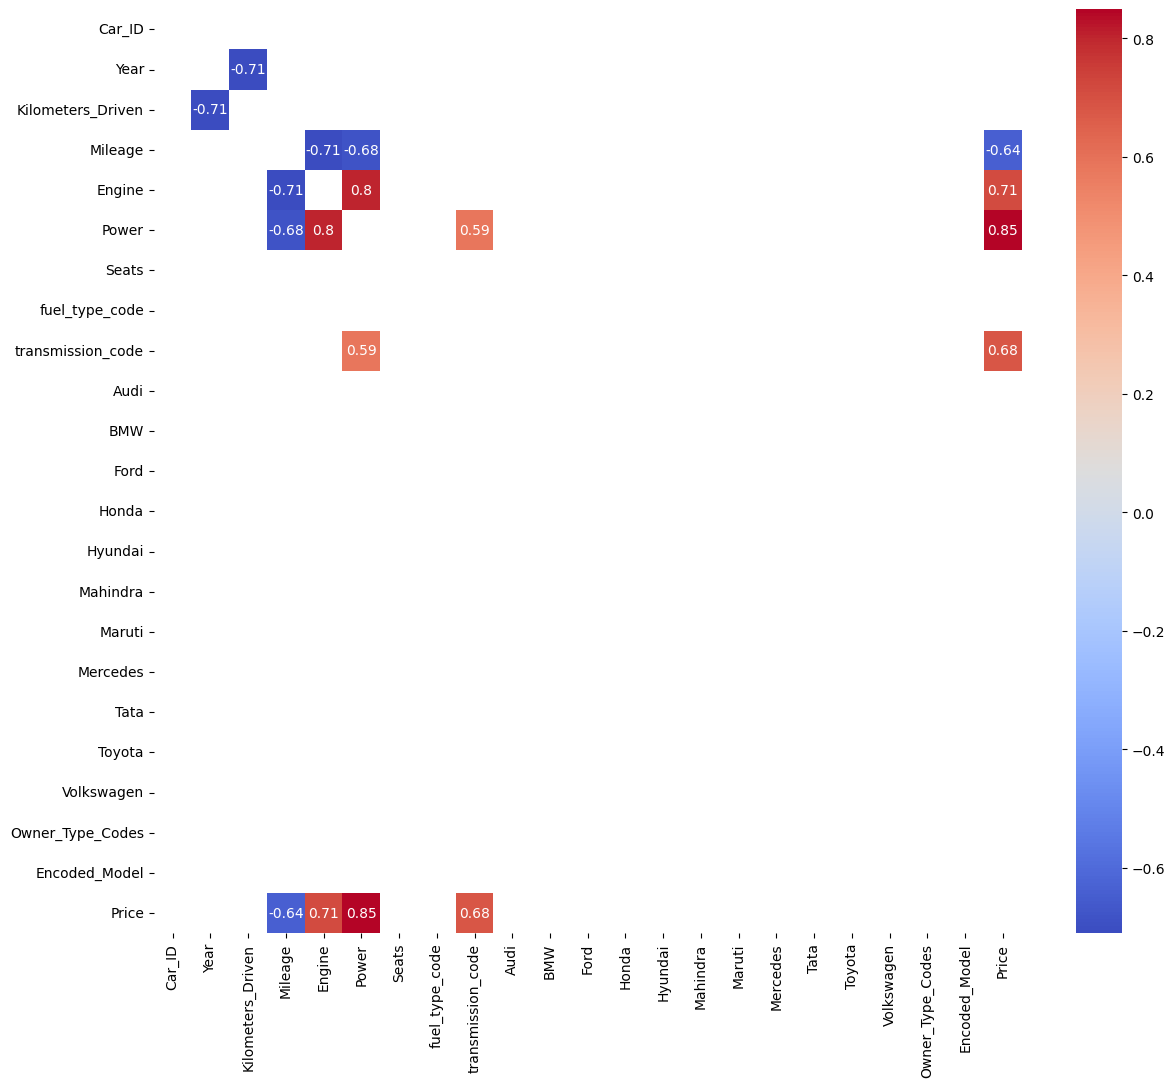

In [30]:
plt.figure(figsize=(14,12))
sns.heatmap(strong_corr, annot=True, fmt=".2g",cmap='coolwarm')

**Висновок:**

З цільовою колонкою *Price* найбільше корелюють:


Позитивно - Engine  0.71, Power  0.85, Transmission_code  0.68

Негативно - Mileage  -0.64

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_reg = LinearRegression()
model = lin_reg.fit(X_train, y_train)



In [51]:
lin_reg.coef_, lin_reg.intercept_

(array([-4.05804768e+01, -5.92287033e+03, -9.39449711e+00, -4.10384689e+04,
        -3.69389002e+01,  6.03280487e+03, -2.29777683e+03, -3.73230603e+05,
         2.25399598e+05,  7.58336219e+05,  7.44055118e+05, -3.21088100e+05,
        -1.87227394e+05, -4.90118472e+05, -5.70086236e+05, -3.97566127e+05,
         7.33191669e+05, -1.39318684e+05,  1.27194389e+05, -2.57372382e+05,
         7.34996945e+04,  4.78621012e+04]),
 13519144.269404028)

In [32]:
predict_test = model.predict(X_test)
predict_train = model.predict(X_train)

loss_mse_test = mean_squared_error(y_test, predict_test)
loss_mse_train = mean_squared_error(y_train, predict_train)

loss_rmse_test = np.sqrt(loss_mse_test)
loss_rmse_train = np.sqrt(loss_mse_train)

loss_rmse_test, loss_rmse_train

(253522.62038534053, 209268.23900432826)

In [242]:
y_train.max(), y_train.std(), y_train.min()

(4000000, 1040405.2277717004, 450000)

Text(0, 0.5, 'predict_test')

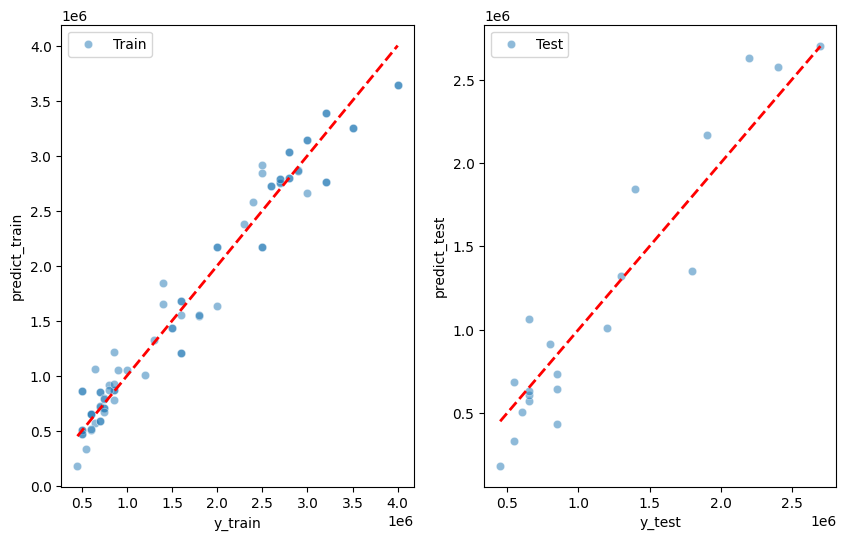

In [48]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.scatterplot(x=y_train, y=predict_train, alpha=0.5, label="Train")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel("y_train")
plt.ylabel("predict_train")

plt.subplot(1,2,2)
sns.scatterplot(x=y_test, y=predict_test, alpha=0.5, label="Test")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("y_test")
plt.ylabel("predict_test")

Аналізуючи графіки видно що прогноз не дає чіткої лінії, тобто модель є куди покращувати, на тестових даних розкид більше

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

**Без виключення категоріальних змінних**

In [129]:
from sklearn.preprocessing import StandardScaler


scaler1 = StandardScaler()
scaler1.fit(X_train)

StandardScaler()

In [130]:
scaler1_train = scaler1.transform(X_train)
scaler1_test = scaler1.transform(X_test)

In [139]:
scaler1_train

array([[ 1.09092769,  0.56881254, -0.69387081, ...,  3.22932987,
         0.53530338,  0.25264558],
       [ 0.10038127, -0.32344242, -0.03953291, ..., -0.30966177,
        -0.99413485,  0.25264558],
       [-0.92554181, -0.32344242, -0.03953291, ..., -0.30966177,
        -0.99413485,  0.25264558],
       ...,
       [-1.63307497, -0.32344242,  1.81442446, ..., -0.30966177,
         0.53530338, -1.43165827],
       [-0.89016515,  0.56881254, -0.69387081, ..., -0.30966177,
         0.53530338,  0.25264558],
       [ 0.80791442,  0.56881254, -0.69387081, ..., -0.30966177,
        -0.99413485,  0.25264558]])

In [132]:
scaler1.set_output(transform="pandas")

StandardScaler()

In [142]:
input_all_df = scaler1.transform(X_train)
input_all_df

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model
83,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303,0.252646
55,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,-1.025320,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135,0.252646
26,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,0.975305,0.795395,3.000000,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135,0.252646
54,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,0.975305,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,3.229330,0.535303,-1.431658
19,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,0.975305,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,2.808717,-0.377964,-0.333333,-0.309662,0.535303,-1.431658
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,-1.739205,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,-1.025320,-1.257237,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,-0.229416,3.872983,-0.356034,-0.377964,-0.333333,-0.309662,2.064742,-1.431658
2,-1.774582,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,0.975305,0.795395,-0.333333,-0.356034,2.808717,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,-0.994135,1.936949
6,-1.633075,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,-1.025320,0.795395,-0.333333,-0.356034,-0.356034,-0.258199,-0.284747,4.358899,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303,-1.431658
27,-0.890165,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,-1.025320,0.795395,-0.333333,2.808717,-0.356034,-0.258199,-0.284747,-0.229416,-0.258199,-0.356034,-0.377964,-0.333333,-0.309662,0.535303,0.252646


In [81]:
X_train.head(3)

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Encoded_Model
83,84,2019,22000,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,2
55,56,2018,28000,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
26,27,2018,28000,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [135]:

lin_reg = LinearRegression()
model = lin_reg.fit(scaler1_train, y_train)

In [136]:
predict_test = model.predict(scaler1_test)
predict_train = model.predict(scaler1_train)

loss_mse_test = mean_squared_error(y_test, predict_test)
loss_mse_train = mean_squared_error(y_train, predict_train)

loss_rmse_test = np.sqrt(loss_mse_test)
loss_rmse_train = np.sqrt(loss_mse_train)

loss_rmse_test, loss_rmse_train

(253522.62038534053, 209268.23900432826)

In [110]:
X_train.columns

Index(['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power',
       'Seats', 'fuel_type_code', 'transmission_code', 'Audi', 'BMW', 'Ford',
       'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes', 'Encoded_Model'],
      dtype='object')

In [109]:
weights_df = pd.DataFrame({
    'feature': np.append(X_train.columns, 1),
    'weight': np.append(lin_reg.coef_, lin_reg.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
22,1,1.680000e+06
5,Power,4.912107e+05
10,BMW,2.127076e+05
16,Mercedes,2.092749e+05
9,Audi,2.062343e+05
8,transmission_code,1.098100e+05
20,Owner_Type_Codes,4.805666e+04
21,Encoded_Model,2.841655e+04
18,Toyota,1.689174e+04
0,Car_ID,-1.147098e+03


Виходячи з коефіцієнтів найвпливовішими є Power - авто з більшою потужністю дорожче, потім бренди авто: BMW, Mercedes, Audi - преміальні бренди значно підвищують вартість машини. На четвертому місці - transmission -ймовірно, автоматичні коробки передач дорожчі.

Mileage: Чим вищий пробіг, тим нижча вартість.
fuel_type_code: Від’ємний вплив може означати, що дизельні авто дешевші.

Для мене це **логічні** показники

**З виключенням категоріальних змінних**

In [111]:
exclude_col = ["fuel_type_code", "transmission_code","Owner_Type_Codes", "Encoded_Model", "Audi", "BMW",	"Ford",	"Honda",	"Hyundai",	"Mahindra",	"Maruti",	"Mercedes",	"Tata",	"Toyota",	"Volkswagen"]

X_train_num = X_train[[col for col in X_train.columns if col not in exclude_col]]
X_test_num = X_test[[col for col in X_test.columns if col not in exclude_col]]

X_train_num, X_test_num

(    Car_ID  Year  Kilometers_Driven  Mileage  Engine  Power  Seats
 83      84  2019              22000       18    1498    148      5
 55      56  2018              28000       17    1968    187      5
 26      27  2018              28000       15    1984    241      5
 54      55  2017              32000       18    1598    103      5
 19      20  2017              26000       12    1991    241      5
 ..     ...   ...                ...      ...     ...    ...    ...
 3        4  2020              30000       23    1248     74      5
 2        3  2017              20000       10    4951    395      4
 6        7  2018              45000       15    2179    140      7
 27      28  2019              22000       18    1995    187      5
 75      76  2019              22000       15    2993    261      5
 
 [80 rows x 7 columns],
     Car_ID  Year  Kilometers_Driven  Mileage  Engine  Power  Seats
 17      18  2016              38000       15    1395    148      5
 41      42  2019     

In [112]:
from sklearn.preprocessing import StandardScaler


scaler2 = StandardScaler()
scaler2.fit(X_train_num)

StandardScaler()

In [113]:
scaler2_train = scaler2.transform(X_train_num)
scaler2_test = scaler2.transform(X_test_num)

In [ ]:
scaler2_train

In [114]:

categorical_data = X_train[exclude_col].values
categorical_data

array([[1., 1., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [115]:
numeric_cols = ["Car_ID",	"Year",	"Kilometers_Driven",	"Mileage",	"Engine",	"Power",	"Seats"]

In [116]:
inputs = np.concatenate((scaler2_train, categorical_data), axis=1)

lin_reg = LinearRegression()
model = lin_reg.fit(inputs, y_train)


In [118]:
column_names = numeric_cols + exclude_col

In [117]:
inputs

array([[ 1.09092769,  0.56881254, -0.69387081, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.10038127, -0.32344242, -0.03953291, ...,  0.        ,
         0.        ,  0.        ],
       [-0.92554181, -0.32344242, -0.03953291, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-1.63307497, -0.32344242,  1.81442446, ...,  0.        ,
         0.        ,  0.        ],
       [-0.89016515,  0.56881254, -0.69387081, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80791442,  0.56881254, -0.69387081, ...,  0.        ,
         0.        ,  0.        ]])

In [137]:
inputs_divide_cat_df = pd.DataFrame(inputs, columns=column_names)
inputs_divide_cat_df

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,fuel_type_code,transmission_code,Owner_Type_Codes,Encoded_Model,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen
0,1.090928,0.568813,-0.693871,0.274862,-0.628491,-0.231967,-0.303562,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.100381,-0.323442,-0.039533,-0.018324,0.087196,0.247012,-0.303562,0.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.925542,-0.323442,-0.039533,-0.604696,0.111560,0.910213,-0.303562,1.0,1.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.065005,-1.215697,0.396692,0.274862,-0.476217,-0.784634,-0.303562,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.173178,-1.215697,-0.257646,-1.484254,0.122219,0.910213,-0.303562,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,-1.739205,1.461068,0.178580,1.740791,-1.009176,-1.140798,-0.303562,0.0,0.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
76,-1.774582,-1.215697,-0.911983,-2.070625,4.629524,2.801564,-1.652729,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,-1.633075,-0.323442,1.814424,-0.604696,0.408494,-0.330219,2.394771,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
78,-0.890165,0.568813,-0.693871,0.274862,0.128310,0.247012,-0.303562,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + exclude_col, 1),
    'weight': np.append(lin_reg.coef_, lin_reg.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
22,1,1.520031e+06
11,Audi,7.583362e+05
12,BMW,7.440551e+05
18,Mercedes,7.331917e+05
5,Power,4.912107e+05
8,transmission_code,2.253996e+05
20,Toyota,1.271944e+05
9,Owner_Type_Codes,7.349969e+04
10,Encoded_Model,4.786210e+04
0,Car_ID,-1.147098e+03


Аналізуючи коефіцієнти коли ми видаляємо категоріальні змінні то значимість змінила порядок, але в топ 4 залишилися ті ж колонки : Audi, BMW, Mercedes, Power,transmission_code

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

In [158]:
len(input_all_df.columns)

22

In [143]:
import statsmodels.api as sm

Y = y_train
X = input_all_df
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params


,0
const,1.680000e+06
Car_ID,-1.147098e+03
Year,-6.638092e+03
Kilometers_Driven,-8.614354e+04
Mileage,-1.399742e+05
Engine,-2.425821e+04
Power,4.912107e+05
Seats,-1.703108e+03
fuel_type_code,-1.865570e+05
transmission_code,1.098100e+05


In [144]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     64.65
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.28e-32
Time:                        20:30:23   Log-Likelihood:                -1093.6
No. Observations:                  80   AIC:                             2231.
Df Residuals:                      58   BIC:                             2284.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.75e+0

Мале p-значення (менше 0.05): Вказує на те, що коефіцієнт є статистично значущим, тобто змінна має значний вплив на залежну змінну.

Значущі ознаки: Power, Audi, BMW, fuel_type_code, Ford, Hyundai, Mahindra ,Maruti, Mercedes,Tata, transmission_code, Volkswagen, Mileage

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

In [153]:
col_stats = ["Power", "Audi", "BMW", "fuel_type_code", "Ford", "Hyundai", "Mahindra" ,"Maruti", "Mercedes", "transmission_code", "Volkswagen", "Mileage"]
stat_input = input_all_df[[col for col in input_all_df if col in col_stats]]
len(stat_input.columns), len(col_stats)

(12, 12)

In [154]:
Y = y_train
X = stat_input
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

,0
const,1.680000e+06
Mileage,-1.430094e+05
Power,4.556152e+05
fuel_type_code,-1.337141e+05
transmission_code,1.310778e+05
Audi,2.496895e+05
BMW,2.949781e+05
Ford,-4.855211e+04
Hyundai,-1.027479e+05
Mahindra,-8.538214e+04


In [155]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     109.4
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           4.12e-39
Time:                        20:50:11   Log-Likelihood:                -1100.4
No. Observations:                  80   AIC:                             2227.
Df Residuals:                      67   BIC:                             2258.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.78e+0

змінились R2 і Adj. R-squared - вони погіршилися

були: 0.959 та 0.944

стали: 0.951 та 0.943

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?

In [152]:
big_col_stats = ["Kilometers_Driven", "Honda", "Tata","Power", "Audi", "BMW", "fuel_type_code", "Ford", "Hyundai", "Mahindra" ,"Maruti", "Mercedes", "transmission_code", "Volkswagen", "Mileage"]
big_stat_input = input_all_df[[col for col in input_all_df if col in big_col_stats]]
len(big_stat_input.columns), len(big_col_stats)

(15, 15)

In [156]:
Y = y_train
X = big_stat_input
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()
results.params

,0
const,1.680000e+06
Kilometers_Driven,-7.887396e+04
Mileage,-1.213232e+05
Power,4.666618e+05
fuel_type_code,-1.629442e+05
transmission_code,1.175415e+05
Audi,1.949556e+05
BMW,2.092733e+05
Ford,-1.139975e+05
Honda,-7.974914e+04


In [157]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     97.03
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           4.85e-38
Time:                        20:50:41   Log-Likelihood:                -1094.7
No. Observations:                  80   AIC:                             2221.
Df Residuals:                      64   BIC:                             2260.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               1.68e+06   2.65e+0

В цій моделі покращені показники по дум метрикам

R-squared:                       0.958

Adj. R-squared:                  0.948

Використовуючи впливовість колонок з **р-value менше 0.25** я вважаю більш ефективно, ми використали 15 колонок з 22 можливих і при цьому показали **кращій результат по Adj. R-squared та майже без різниці результат R-squared**, але полегшили модель і використання значень

Я б використала останню - третю модель